## Indexing and selecting data

GeoPandas inherits the standard [pandas](http://pandas.pydata.org/pandas-docs/stable/indexing.html) methods for indexing/selecting data. This includes label based indexing with [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc) and integer position based indexing with [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc), which apply to both [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) and [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) objects. For more information on indexing/selecting, see the [pandas](http://pandas.pydata.org/pandas-docs/stable/indexing.html) documentation.

In addition to the standard [pandas](http://pandas.pydata.org/pandas-docs/stable/indexing.html) methods, GeoPandas also provides coordinate based indexing with the [`cx`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html#geopandas.GeoDataFrame.cx) indexer, which slices using a bounding box. Geometries in the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) or [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) that intersect the bounding box will be returned.

Using the *`geoda.chile_labor`* dataset, you can use this functionality to quickly select parts of Chile whose boundaries extend south of the -50 degrees latitude. You can first check the original GeoDataFrame.

In [1]:
import geodatasets
import geopandas

In [3]:
geodatasets.get_path('geoda.chile_labor')

'/home/yousef/.cache/geodatasets/flma.zip.unzip/flma/FLMA.geojson'

In [4]:
chile = geopandas.read_file(geodatasets.get_path('geoda.chile_labor'))
chile.head()

,dummy,code_flma,mun,pop_1982,pop_1992,pop_2002,area_km2,age1__1982,age2__1982,age3__1982,...,oc1_r_2002,oc2_r_2002,oc3_r_2002,oc4_r_2002,oc5_r_2002,oc6_r_2002,oc7_r_2002,oc8_r_2002,oc9_r_2002,geometry
0,0.0,10101,Puerto Montt,209790.0,247560.0,303404.0,14229.0,22597.0,24639.0,26953.0,...,5256.0,7182.0,11608.0,8092.0,11873.0,11006.0,13099.0,9328.0,19158.0,"MULTIPOLYGON (((-73.22932 -41.73711, -73.18976..."
1,0.0,10201,Castro,45715.0,49793.0,61103.0,2260.0,4758.0,4906.0,5418.0,...,1015.0,1428.0,2056.0,1396.0,2269.0,1994.0,2831.0,2025.0,3690.0,"MULTIPOLYGON (((-73.56381 -42.91608, -73.51829..."
2,0.0,10202,Ancud,29642.0,37577.0,39762.0,1751.0,3159.0,3480.0,3596.0,...,560.0,807.0,1009.0,789.0,1214.0,2473.0,1288.0,1239.0,2449.0,"MULTIPOLYGON (((-73.51486 -41.97297, -73.52489..."
3,0.0,10205,Curaco de Velez,27585.0,28084.0,31543.0,1915.0,2913.0,3390.0,3386.0,...,277.0,430.0,595.0,317.0,618.0,1992.0,865.0,781.0,1757.0,"MULTIPOLYGON (((-73.34313 -42.62237, -73.23388..."
4,0.0,10208,Quellon,11238.0,16336.0,22985.0,3972.0,1497.0,1371.0,1454.0,...,343.0,307.0,597.0,340.0,689.0,1709.0,1369.0,761.0,1878.0,"MULTIPOLYGON (((-73.51016 -44.10054, -73.44435..."


<Axes: >

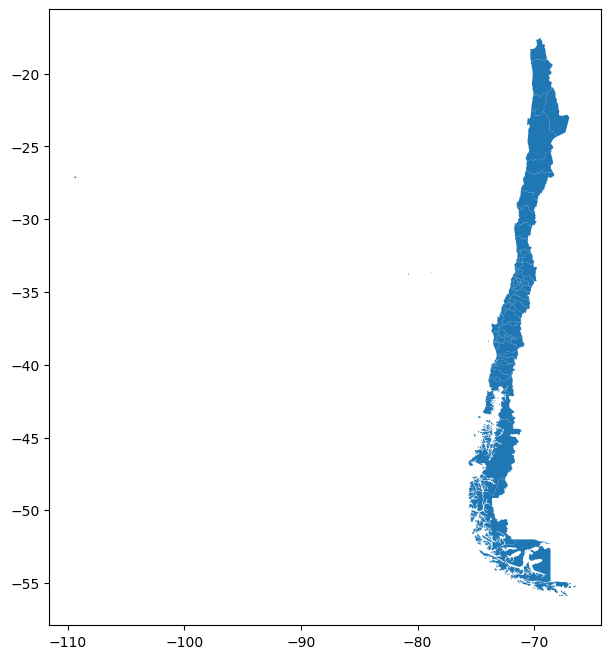

In [5]:
chile.plot(figsize=(8, 8))

And then select only the southern part of the country.

#### property GeoDataFrame.cx
Coordinate based indexer to select by intersection with bounding box.

Format of input should be *`.cx[xmin:xmax, ymin:ymax]`*. Any of *`xmin`*, *`xmax`*, *`ymin`*, and *`ymax`* can be provided, but input must include a comma separating x and y slices. That is, *`.cx[:, :]`* will return the full series/frame, but *`.cx[:]`* is not implemented.

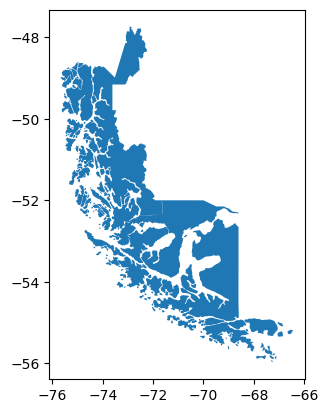

In [23]:
southern_chile = chile.cx[:, :-50].plot()
southern_chile.plot(figsize=(8, 8));